In [147]:
import pandas as pd
import numpy as np

In [148]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Discharge Date,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,2024-02-02,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,2019-08-26,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,2022-10-07,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,2020-12-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,2022-10-09,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,Penicillin,Abnormal


# **Data Preprocessing**

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Discharge Date      55500 non-null  object 
 7   Doctor              55500 non-null  object 
 8   Hospital            55500 non-null  object 
 9   Insurance Provider  55500 non-null  object 
 10  Billing Amount      55500 non-null  float64
 11  Room Number         55500 non-null  int64  
 12  Admission Type      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [150]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224655,202.000000
50%,52.000000,25538.069380,302.000000
75%,68.000000,37820.508432,401.000000
max,89.000000,52764.276740,500.000000


In [151]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%Y-%m-%d')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%Y-%m-%d')

df['Days of Stay'] = 0
for i in range(len(df)):
  time_difference = df['Discharge Date'][i] - df['Date of Admission'][i]
  df['Days of Stay'][i] = time_difference.days
df.head()

Streaming output truncated to the last 5000 lines.
<ipython-input-151-a174e0e552c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Days of Stay'][i] = time_difference.days
<ipython-input-151-a174e0e552c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Days of Stay'][i] = time_difference.days
<ipython-input-151-a174e0e552c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Days of Stay'][i] = time_difference.days
<ipytho

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Discharge Date,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Days of Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,2024-02-02,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,2019-08-26,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,2022-10-07,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,2020-12-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,2022-10-09,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,Penicillin,Abnormal,20


In [152]:
df = df.drop(columns=['Date of Admission', 'Discharge Date','Name','Room Number'])
df.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days of Stay
0,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.32729,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.31781,Urgent,Penicillin,Abnormal,20


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Doctor              55500 non-null  object 
 5   Hospital            55500 non-null  object 
 6   Insurance Provider  55500 non-null  object 
 7   Billing Amount      55500 non-null  float64
 8   Admission Type      55500 non-null  object 
 9   Medication          55500 non-null  object 
 10  Test Results        55500 non-null  object 
 11  Days of Stay        55500 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 5.1+ MB


In [154]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df['Gender_Male']=df['Gender_Male'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Blood Type          55500 non-null  object 
 2   Medical Condition   55500 non-null  object 
 3   Doctor              55500 non-null  object 
 4   Hospital            55500 non-null  object 
 5   Insurance Provider  55500 non-null  object 
 6   Billing Amount      55500 non-null  float64
 7   Admission Type      55500 non-null  object 
 8   Medication          55500 non-null  object 
 9   Test Results        55500 non-null  object 
 10  Days of Stay        55500 non-null  int64  
 11  Gender_Male         55500 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.1+ MB


In [155]:
count = (df['Billing Amount'] < 0).sum()
print(f"Count of negative 'Billing Amount': {count}")

Count of negative 'Billing Amount': 108


In [156]:
for i in range(len(df['Billing Amount'])):
  if df['Billing Amount'][i] < 0:
    df['Billing Amount'][i] = df['Billing Amount'][i] * -1

<ipython-input-156-8fd7f81049e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing Amount'][i] = df['Billing Amount'][i] * -1
<ipython-input-156-8fd7f81049e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing Amount'][i] = df['Billing Amount'][i] * -1
<ipython-input-156-8fd7f81049e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing Amount'][i] = df['Billing Amount'][i] * -1
<ipython-input-156-8fd7f8104

In [157]:
df.describe()

,Age,Billing Amount,Days of Stay,Gender_Male
count,55500.000000,55500.000000,55500.000000,55500.000000
mean,51.539459,25541.259324,15.509009,0.500432
std,19.602454,14207.961646,8.659600,0.500004
min,13.000000,9.238787,1.000000,0.000000
25%,35.000000,13241.224655,8.000000,0.000000
50%,52.000000,25538.069380,15.000000,1.000000
75%,68.000000,37820.508432,23.000000,1.000000
max,89.000000,52764.276740,30.000000,1.000000


In [158]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].unique())

Blood Type ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Medical Condition ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Doctor ['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']
Hospital ['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']
Insurance Provider ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Admission Type ['Urgent' 'Emergency' 'Elective']
Medication ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
Test Results ['Normal' 'Inconclusive' 'Abnormal']


In [159]:
print(f"number of doctors: {df['Doctor'].nunique()}")
print(f"number of hospital: {df['Hospital'].nunique()}")

number of doctors: 40341
number of hospital: 39876


In [160]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

# Loop through each column in the DataFrame
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

print(df_encoded.head())


   Age  Blood Type  Medical Condition  Doctor  Hospital  Insurance Provider  \
0   30           5                  2   26612     29933                   1   
1   62           0                  5   33648     16012                   3   
2   76           1                  5   37828      5473                   0   
3   28           6                  3   22511     12317                   3   
4   43           2                  2   21259     33598                   0   

   Billing Amount  Admission Type  Medication  Test Results  Days of Stay  \
0     18856.28131               2           3             2             2   
1     33643.32729               1           1             1             6   
2     27955.09608               1           0             2            15   
3     37909.78241               0           1             0            30   
4     14238.31781               2           4             0            20   

   Gender_Male  
0            1  
1            1  
2          

In [161]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Blood Type          55500 non-null  int64  
 2   Medical Condition   55500 non-null  int64  
 3   Doctor              55500 non-null  int64  
 4   Hospital            55500 non-null  int64  
 5   Insurance Provider  55500 non-null  int64  
 6   Billing Amount      55500 non-null  float64
 7   Admission Type      55500 non-null  int64  
 8   Medication          55500 non-null  int64  
 9   Test Results        55500 non-null  int64  
 10  Days of Stay        55500 non-null  int64  
 11  Gender_Male         55500 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.1 MB


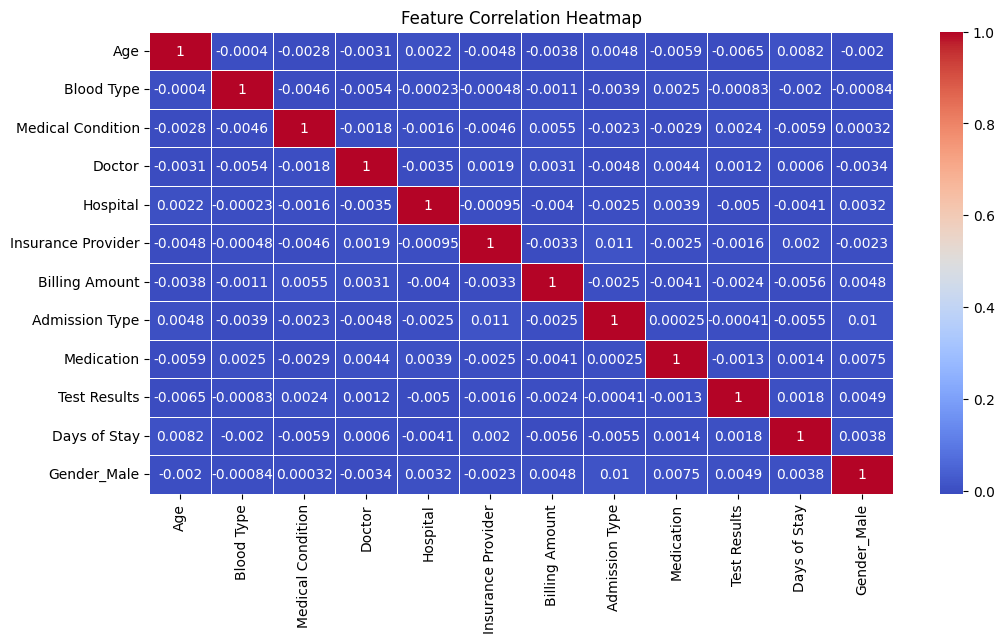

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [163]:
df_encoded.drop(columns = ['Blood Type','Admission Type','Doctor','Insurance Provider','Medication','Days of Stay'])

,Age,Medical Condition,Hospital,Billing Amount,Test Results,Gender_Male
0,30,2,29933,18856.281310,2,1
1,62,5,16012,33643.327290,1,1
2,76,5,5473,27955.096080,2,0
3,28,3,12317,37909.782410,0,0
4,43,2,33598,14238.317810,0,0
...,...,...,...,...,...,...
55495,42,1,15553,2650.714952,0,0
55496,61,5,31722,31457.797310,2,0
55497,38,4,37408,27620.764720,0,0
55498,43,0,14329,32451.092360,0,1


In [164]:
# Example of inverse transformation
df_encoded['Test Results Original'] = label_encoders['Test Results'].inverse_transform(df_encoded['Test Results'])


In [165]:
df_encoded.head()

,Age,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days of Stay,Gender_Male,Test Results Original
0,30,5,2,26612,29933,1,18856.28131,2,3,2,2,1,Normal
1,62,0,5,33648,16012,3,33643.32729,1,1,1,6,1,Inconclusive
2,76,1,5,37828,5473,0,27955.09608,1,0,2,15,0,Normal
3,28,6,3,22511,12317,3,37909.78241,0,1,0,30,0,Abnormal
4,43,2,2,21259,33598,0,14238.31781,2,4,0,20,0,Abnormal


In [166]:
df_encoded.isnull().sum()

,0
Age,0
Blood Type,0
Medical Condition,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0
Admission Type,0
Medication,0
Test Results,0


In [167]:
df_encoded.isna().sum()

,0
Age,0
Blood Type,0
Medical Condition,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0
Admission Type,0
Medication,0
Test Results,0


## **Models**

In [168]:
x = df_encoded.loc[:, df_encoded.columns != 'Test Results Original']
y = df_encoded['Test Results Original']
x.head()

,Age,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days of Stay,Gender_Male
0,30,5,2,26612,29933,1,18856.28131,2,3,2,2,1
1,62,0,5,33648,16012,3,33643.32729,1,1,1,6,1
2,76,1,5,37828,5473,0,27955.09608,1,0,2,15,0
3,28,6,3,22511,12317,3,37909.78241,0,1,0,30,0
4,43,2,2,21259,33598,0,14238.31781,2,4,0,20,0


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , f1_score

y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')
print('check model')
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(model, x, y_encoded, cv=5)
print(f'Individual Fold Accuracies: {cv_scores*100}')
print(f'Cross-Validation Accuracy: {cv_scores.mean()*100:.2f}%')


Accuracy: 100.00%
F1 Score: 1.00
check model
x_train shape: (44400, 12)
x_test shape: (11100, 12)
y_train shape: (44400,)
y_test shape: (11100,)
Training Accuracy: 100.00%
Individual Fold Accuracies: [100. 100. 100. 100. 100.]
Cross-Validation Accuracy: 100.00%


In [170]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf')

# Train the model
svm_model.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy*100:.2f}%')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

SVM Accuracy: 33.64%
F1 Score: 0.30


In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the KNN model with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy*100:.2f}%')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

KNN Accuracy: 36.74%
F1 Score: 0.36


In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score , f1_score
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 10],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting function 'uniform' means all neighbors have equal weight, 'distance' means closer neighbors have more weight.
    'p': [1, 2]  # Power parameter for Minkowski distance (1: Manhattan, 2: Euclidean)
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Apply Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Initialize the KNN model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)

# Train the model with the best parameters
best_knn_model.fit(x_train, y_train)

# Predict on the test set
y_pred = best_knn_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized KNN Accuracy: {accuracy*100:.2f}%')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Optimized KNN Accuracy: 43.44%
F1 Score: 0.43


In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=9, p=1, weights='distance'))
])

# Fit the pipeline
pipeline.fit(x_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Optimized KNN Accuracy: {accuracy*100:.2f}%")
print(f"F1 Score: {f1:.2f}")


Optimized KNN Accuracy: 99.77%
F1 Score: 1.00


In [174]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, x, y_encoded, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean()*100:.2f}%')
print(f'Cross-Validation Standard Deviation: {cv_scores.std()*100:.2f}%')

Cross-Validation Accuracy: 99.81%
Cross-Validation Standard Deviation: 0.06%
